# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("dataset/phase_3_TRAIN_7d499bff69ca69b6_6372c3e_MLPC2021_generic.csv")

In [3]:
df.head()

,id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,...,midlevel_features_rhythm_complexity,midlevel_features_rhythm_stability,midlevel_features_dissonance,midlevel_features_tonal_stability,midlevel_features_minorness,score_mode,score_key_strength,mean_A,mean_V,quadrant
0,GG-01-000,0.206445,0.131383,13.998791,58.329521,3.1,0.539736,0.193987,3367.790527,3684.124268,...,-0.303987,-0.053306,-0.325228,0.347745,-0.119278,0.0,0.795727,50.689655,2.724138,1
1,GG-01-001,0.145753,0.057971,3.533264,75.166183,4.2,0.476832,0.123564,1395.528809,401.987610,...,-0.381182,0.120750,-0.479266,0.451572,-0.064252,0.0,0.844387,50.689655,2.724138,1
2,GG-01-002,0.149111,0.059011,3.337368,82.753929,4.3,0.457741,0.132359,1318.759644,289.306152,...,-0.337422,0.103853,-0.388214,0.430684,-0.226197,0.0,0.758119,50.689655,2.724138,1
3,GG-01-003,0.163914,0.057474,3.078172,79.024742,4.1,0.504427,0.121134,1258.258423,262.561310,...,-0.314282,0.118872,-0.335902,0.314371,-0.006619,1.0,0.747180,50.689655,2.724138,1
4,GG-01-004,0.157382,0.054116,2.682208,59.633064,3.9,0.503377,0.121658,1244.375122,260.756195,...,-0.302913,-0.002940,-0.395495,0.368037,-0.162711,0.0,0.710480,50.689655,2.724138,1


# Split dataset into inputs and targets

In [29]:
# drop target value, student annotations and string ID from input features:
X = df.drop(columns=['quadrant','mean_A','mean_V','id','score_mode','score_key_strength'])

# we want to predict the quadrant:
y = df['quadrant'].values

In [30]:
X.head()

,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,essentia_spectral_complexity_mean,...,librosa_spectral_bandwidth_stdev,librosa_spectral_flatness_mean,librosa_spectral_flatness_stdev,midlevel_features_melody,midlevel_features_articulation,midlevel_features_rhythm_complexity,midlevel_features_rhythm_stability,midlevel_features_dissonance,midlevel_features_tonal_stability,midlevel_features_minorness
0,0.206445,0.131383,13.998791,58.329521,3.1,0.539736,0.193987,3367.790527,3684.124268,2.986095,...,1781.705789,0.139911,0.248388,0.065397,-0.029380,-0.303987,-0.053306,-0.325228,0.347745,-0.119278
1,0.145753,0.057971,3.533264,75.166183,4.2,0.476832,0.123564,1395.528809,401.987610,4.181923,...,721.292781,0.000275,0.000484,0.353040,-0.073957,-0.381182,0.120750,-0.479266,0.451572,-0.064252
2,0.149111,0.059011,3.337368,82.753929,4.3,0.457741,0.132359,1318.759644,289.306152,4.303592,...,583.569947,0.000202,0.000314,0.201885,0.016944,-0.337422,0.103853,-0.388214,0.430684,-0.226197
3,0.163914,0.057474,3.078172,79.024742,4.1,0.504427,0.121134,1258.258423,262.561310,5.271147,...,575.961419,0.000202,0.000257,0.181998,-0.019165,-0.314282,0.118872,-0.335902,0.314371,-0.006619
4,0.157382,0.054116,2.682208,59.633064,3.9,0.503377,0.121658,1244.375122,260.756195,4.122828,...,539.887336,0.000217,0.000241,0.256362,-0.151648,-0.302913,-0.002940,-0.395495,0.368037,-0.162711


In [88]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Super Simple kNN (no normalization)

In [89]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit the classifier to the data
knn.fit(X_train,y_train)

knn.score(X_test, y_test)

0.6168582375478927

# Normalize data and perform kNN

In [83]:
X_normalized = MinMaxScaler().fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42, stratify=y)

In [84]:

knn = KNeighborsClassifier(n_neighbors = 5)

# Fit the classifier to the normalized data
knn.fit(X_train,y_train)

knn.score(X_test, y_test)

0.764367816091954

=> By normalizing our feature space we already achieved an improvement of more than 10%!

# Select the best features

In [35]:
print("number of features before feature selection:", X.shape[1])

X_best_5 = SelectKBest(chi2, k=5).fit_transform(X_normalized, y)
X_best_10 = SelectKBest(chi2, k=10).fit_transform(X_normalized, y)
X_best_20 = SelectKBest(chi2, k=20).fit_transform(X_normalized, y)

print("number of features after feature selection:", X_best_10.shape[1])

number of features before feature selection: 87
number of features after feature selection: 10


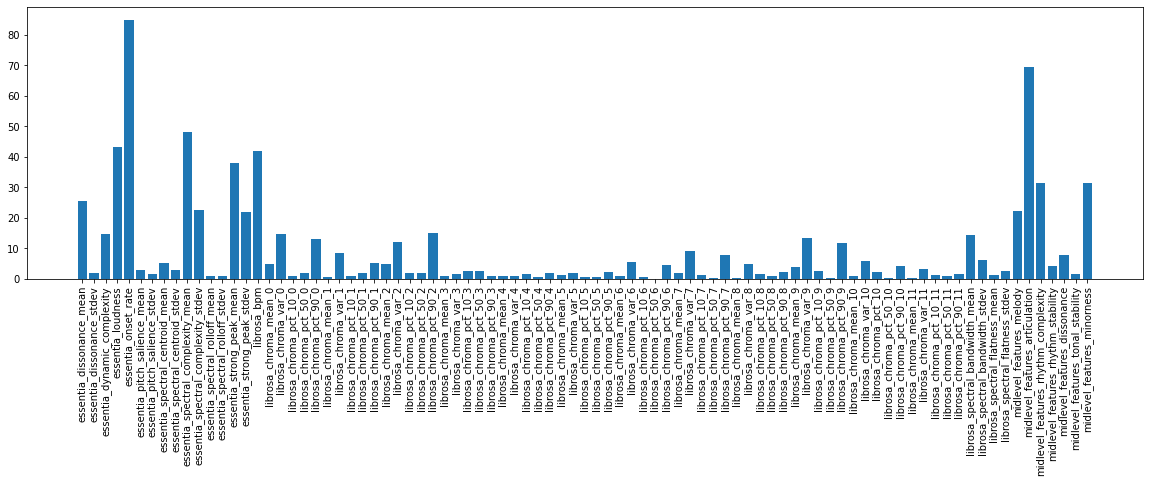

In [36]:
feature_importances = chi2(X_normalized, y)[0]

plt.figure(figsize=(20,5))
plt.bar(x=X.columns, height=feature_importances)
plt.xticks(rotation=90)
plt.show()

In [95]:
sorted_feature_list = [(x, _) for _, x in sorted(zip(feature_importances, X.columns), reverse=True)]
best_5_features = sorted_feature_list[:5]
best_5_features

[('essentia_onset_rate', 84.9072881396441),
 ('midlevel_features_articulation', 69.41478725672926),
 ('essentia_spectral_complexity_mean', 48.1412276057966),
 ('essentia_loudness', 43.225117773465165),
 ('librosa_bpm', 41.979035679989565)]

# Perform kNN with Cross-Validation on different feature subsets

In [76]:
# create new a knn model
knn2 = KNeighborsClassifier()

max_k = 200
k_step = 3
k_range = list(range(1, 21, 1)) + list(range(22, 42, 2)) + list(range(43, 100, 3)) + list(range(100, 200, 5)) + list(range(200, 500, 10))

# create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.array(k_range)}

# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv_normalized = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv_best_5 = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv_best_10 = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv_best_20 = GridSearchCV(knn2, param_grid, cv=5)
 
# fit model to data
knn_gscv.fit(X, y)
knn_gscv_normalized.fit(X_normalized, y)
knn_gscv_best_10.fit(X_best_10, y)
knn_gscv_best_5.fit(X_best_5, y)
knn_gscv_best_20.fit(X_best_20, y)

# get test score (mean of 5-fold CV)
scores_all_features = knn_gscv.cv_results_["mean_test_score"]
scores_all_features_normalized = knn_gscv_normalized.cv_results_["mean_test_score"]
scores_10_best_features = knn_gscv_best_10.cv_results_["mean_test_score"]
scores_5_best_features = knn_gscv_best_5.cv_results_["mean_test_score"]
scores_20_best_features = knn_gscv_best_20.cv_results_["mean_test_score"]

# Evaluation

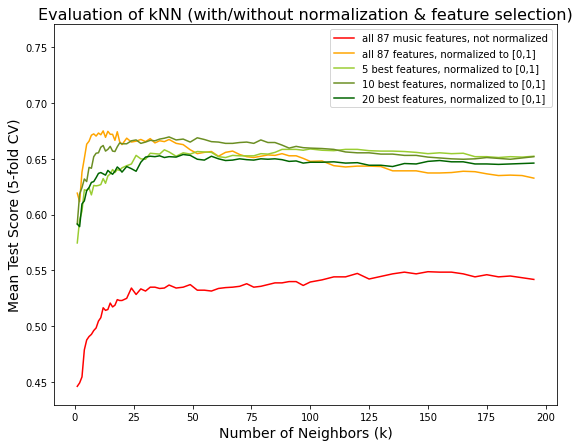

In [72]:
plt.figure(figsize=(9,7))
plt.ylim(0.43,0.77)
plt.plot(k_range, scores_all_features, label="all 87 music features, not normalized", color="red")
plt.plot(k_range, scores_all_features_normalized, label="all 87 features, normalized to [0,1]", color="orange")
plt.plot(k_range, scores_5_best_features, label="5 best features, normalized to [0,1]", color="yellowgreen")
plt.plot(k_range, scores_10_best_features, label="10 best features, normalized to [0,1]", color="olivedrab")
plt.plot(k_range, scores_20_best_features, label="20 best features, normalized to [0,1]", color="darkgreen")

plt.title("Evaluation of kNN (with/without normalization & feature selection)", fontsize=16)
plt.ylabel("Mean Test Score (5-fold CV)", fontsize=14)
plt.xlabel("Number of Neighbors (k)", fontsize=14)
plt.legend()
plt.show()

In [73]:
print("### all 87 features, no normalization ###")
print("best k: ", knn_gscv.best_params_, " best score: ", np.round(knn_gscv.best_score_,4), "\n")

print("### all 87 features, normalized to [0, 1] ###")
print("best k:", knn_gscv_normalized.best_params_, " best score: ", np.round(knn_gscv_normalized.best_score_,4),  "\n")

print("### best 5 features, normalized to [0, 1] ###")
print("best k:", knn_gscv_best_5.best_params_, " best score: ", np.round(knn_gscv_best_5.best_score_,4), "\n")

print("### best 10 features, normalized to [0, 1] ###")
print("best k:", knn_gscv_best_10.best_params_, " best score: ", np.round(knn_gscv_best_10.best_score_,4), "\n")

print("### best 20 features, normalized to [0, 1] ###")
print("best k:", knn_gscv_best_20.best_params_, " best score: ", np.round(knn_gscv_best_20.best_score_,4), "\n")

### all 87 features, no normalization ###
best k:  {'n_neighbors': 150}  best score:  0.5489 

### all 87 features, normalized to [0, 1] ###
best k: {'n_neighbors': 12}  best score:  0.6747 

### best 5 features, normalized to [0, 1] ###
best k: {'n_neighbors': 100}  best score:  0.6586 

### best 10 features, normalized to [0, 1] ###
best k: {'n_neighbors': 40}  best score:  0.6693 

### best 20 features, normalized to [0, 1] ###
best k: {'n_neighbors': 46}  best score:  0.6536 

